# <span style='background :aquamarine' > Progetto Python con Pandas </span>
<img src="Downloads\play store 2.jpg" />

### <span style='font-family:"font_family name"'> <span style=''> In questo progetto andrò ad analizzare un dataset pubblico di Kaggle che contiene dati relativi alle applicazioni del Google play store. L'obiettivo sarà quello di elaborare una strategia ed identificare il settore per la creazione di una una nuova app. 


In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [60]:
df = pd.read_csv('C:\Users\Fiacco\Desktop\googleplaystore.csv')

In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**App:** nome  dell'applicazione <br> **Category:** categoria in cui appartiene <br> **Rating:** valutazione complessiva degli utenti <br> **Reviews:** numero di recensioni <br> **Size:** dimensioni dell'app <br> **Installs:** numeri di utenti che l'hanno scaricata <br> **Type:** se è a pagamento o gratuita <br> **Price:** il prezzo <br> **Content Rating:** il target di età per cui è pensata <br> **Genres:** i sotto generi presenti della categoria di riferimento <br> **Last Update:** data dell'ultimo aggiornamento <br> **Current version:** versione disponibile al download sul play store <br> **Android Version:** versione minima di android che è richiesta per usare l'applicazione                                                                 

## Data cleaning and transformation

### 1. convertire il tipo delle colonne

In [63]:
# in questa riga i dati non sono stati inseriti in modo corretto
df[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [64]:
#cancello la riga e converto i dati della colonna
df.drop(10472, inplace=True)
df['Reviews']= df['Reviews'].astype('int64')

In [65]:
#modifico alcune stringhe per ottenere una conversezione in megabyte facenndo attenzione ad un particolare valore da trattare separatamente
df['Size'] = df['Size'].apply(lambda x: '0.'+str(x) if str(x).endswith('k') and len(x)==4 and str(x)!='8.5k'else x)
df['Size'] = df['Size'].apply(lambda x: '0.0'+str(x) if str(x).endswith('k') and len(x)==3 else x)

In [66]:
#rimuovo le unità di misura (M,k),modifico alcuni valori particolari e converto i dati della colonna
df['Size'] = df['Size'].str.replace("M","").str.replace('k',"") 
df['Size'] = df['Size'].replace(['Varies with device','8.5'],[np.nan,'0.0085'])
df['Size'] =df['Size'].astype(float)

In [67]:
#rimuovo i simboli "+" e "," e coverto i dati della colonna
df['Installs'] = df['Installs'].str.replace("+","").str.replace(',',"")
df['Installs'] = df['Installs'].astype('int64')

In [68]:
#rimuovo il simbolo "$" e converto i dati della colonna
df['Price'] = df['Price'].str.replace("$","")
df['Price'] = df['Price'].astype(float)

###  2. dati nulli e valori mancanti

In [69]:
#conteggio dati nulli e la sua percentuale
count=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().mean()*100).sort_values(ascending=False)
missing_values=pd.DataFrame({'percent':percent,'count':count})
missing_values

,count,percent
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000


In [70]:
# rimuovo duplicati e colonne non utili per l'analisi
df.dropna(how='all')
df.drop_duplicates(inplace=True)
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis= 1, inplace= True)

In [71]:
#sostituisco i valori mancanti con la media
df['Size'].fillna(df['Size'].mean(),inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace= True)

In [72]:
#controllo il valore mancante
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,4.187877,0,21.369521,0,NaN,0.0,Everyone 10+,Strategy


In [19]:
#lo sostituisco con 'Free' dato che il suo costo è 0
df['Type'].fillna('Free', inplace=True)

## Data visualization

In [73]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


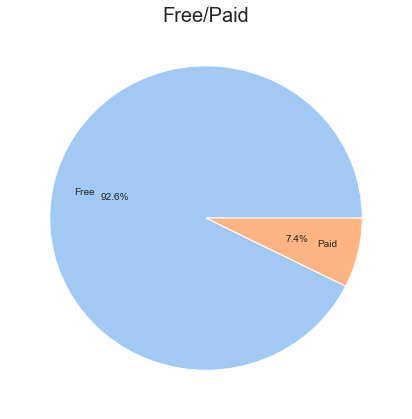

In [74]:
plt.figure(figsize=(7,7))
Type= df['Type'].value_counts()
labels=Type.index
colors=sns.color_palette("pastel")
plt.pie(Type,labels=labels,colors=colors,autopct='%.1f%%',labeldistance=0.73)
plt.title('Free/Paid',fontsize=20)
plt.show()

### La maggior parte delle app sono gratuite (92.6%) rispetto a quelle a pagamento (7.4%) 

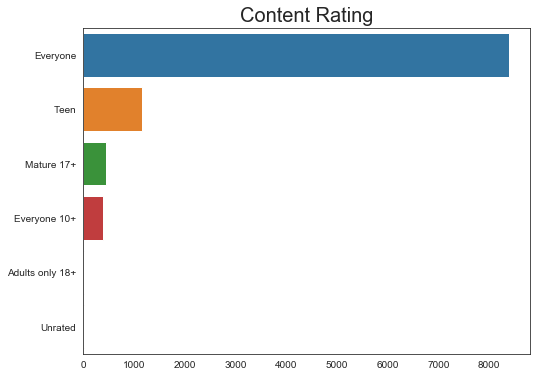

In [75]:
plt.figure(figsize=(8,6))
content_rating=df['Content Rating'].value_counts()
sns.barplot(x=content_rating.values,y=content_rating.index)
plt.title("Content Rating", fontsize=20)
plt.show()

### Quasi tutte le app sono destinate a tutti, mentre a seguire ci sono quelle dedicate ai ragazzi

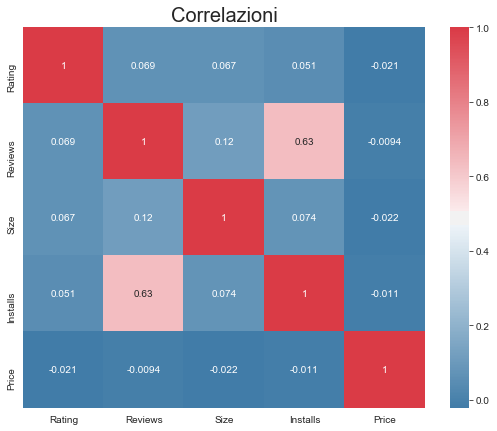

In [76]:
plt.figure(figsize=(9,7))
corr= df.corr()
cmap = sns.diverging_palette(240,10, as_cmap=True)
sns.heatmap(corr, annot=True,cmap=cmap)
plt.title("Correlazioni",fontsize=20)
plt.show()

### L'unica correlazione rilevante è quella tra le installazione e le recensioni, infatti come è logico pensare, le app più installate avranno di conseguenza più utenti che possono lasciare una recensione 

In [77]:
media_rating=df.groupby(['Category','Type'],as_index=False)['Rating'].mean().sort_values(by='Rating')
media_rating_free= media_rating[media_rating['Type'].isin(['Free'])]
media_rating_paid= media_rating[media_rating['Type'].isin(['Paid'])]

In [79]:
media_installs=df.groupby(['Category','Type'],as_index=False)['Installs'].mean().sort_values(by='Installs')
media_installs_free=media_installs[media_installs['Type'].isin(['Free'])]
media_installs_paid=media_installs[media_installs['Type'].isin(['Paid'])]

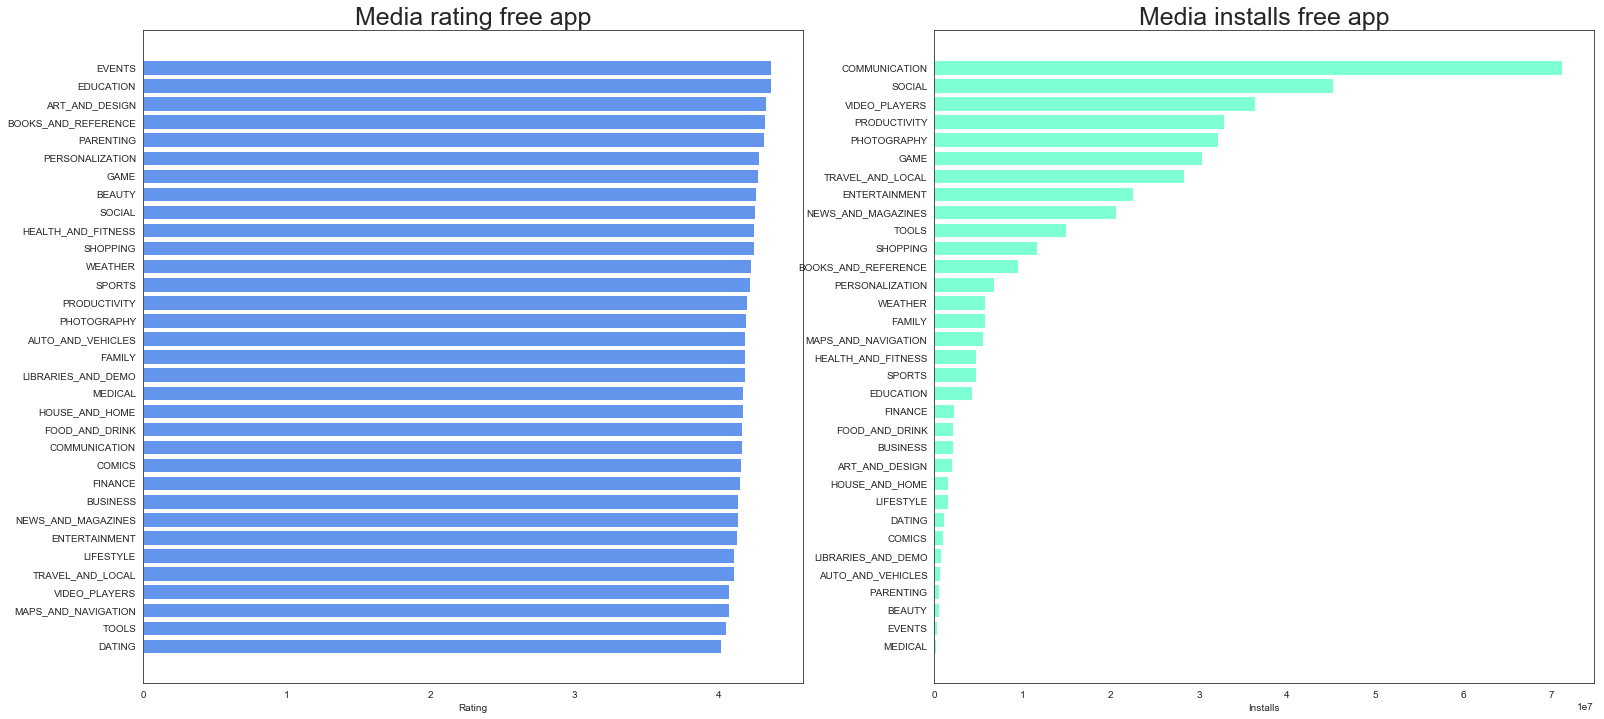

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(26, 12))
ax1.barh(media_rating_free['Category'],media_rating_free['Rating'],color='cornflowerblue')
ax2.barh(media_installs_free['Category'],media_installs_free['Installs'],color='aquamarine')
ax1.set(xlabel='Rating')
ax2.set(xlabel='Installs')
ax1.set_title('Media rating free app',fontsize=25)
ax2.set_title('Media installs free app',fontsize=25)
plt.show()

### Le categorie per le app free ai primi posti nelle installazioni e che lo sono anche nel rating sono "social","productivity","communication"

In [81]:
social=df[df['Category'].isin(['SOCIAL'])]
productivity=df[df['Category'].isin(['PRODUCTIVITY'])]
communication=df[df['Category'].isin(['COMMUNICATION'])]

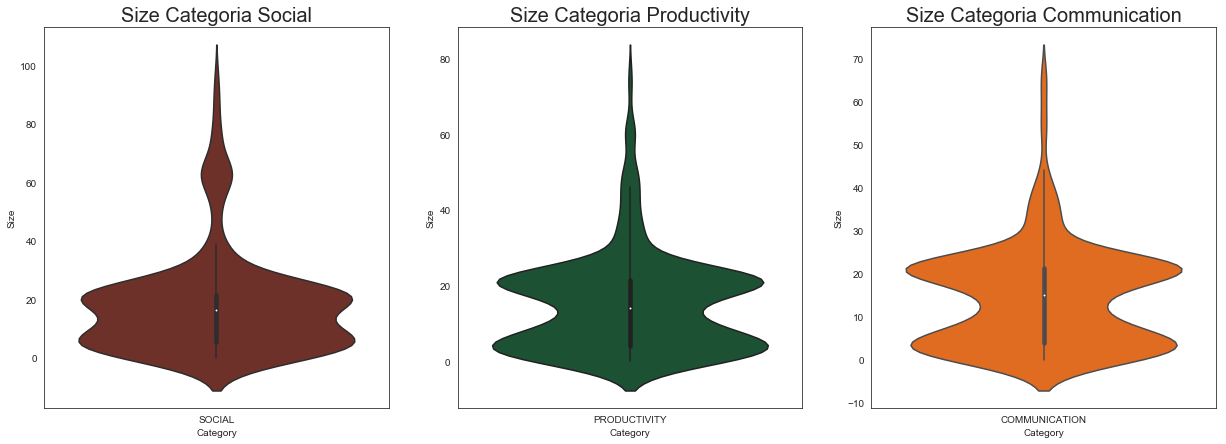

In [83]:
fig, axes = plt.subplots(1,3,figsize=(21, 7))
sns.violinplot(data=social, x="Category", y="Size",ax=axes[0], color="#78281F")
sns.violinplot(data=productivity, x="Category", y="Size",ax=axes[1], color="#145A32")
sns.violinplot(data=communication, x="Category", y="Size",ax=axes[2], color="#FF6600")
axes[0].set_title('Size Categoria Social',fontsize=20)
axes[1].set_title('Size Categoria Productivity',fontsize=20)
axes[2].set_title('Size Categoria Communication',fontsize=20)
plt.show()

### Non ci sono grandi differenze tra queste 3 categorie, le dimensione delle app sono generalmente comprese tra 0 e 20 megabyte

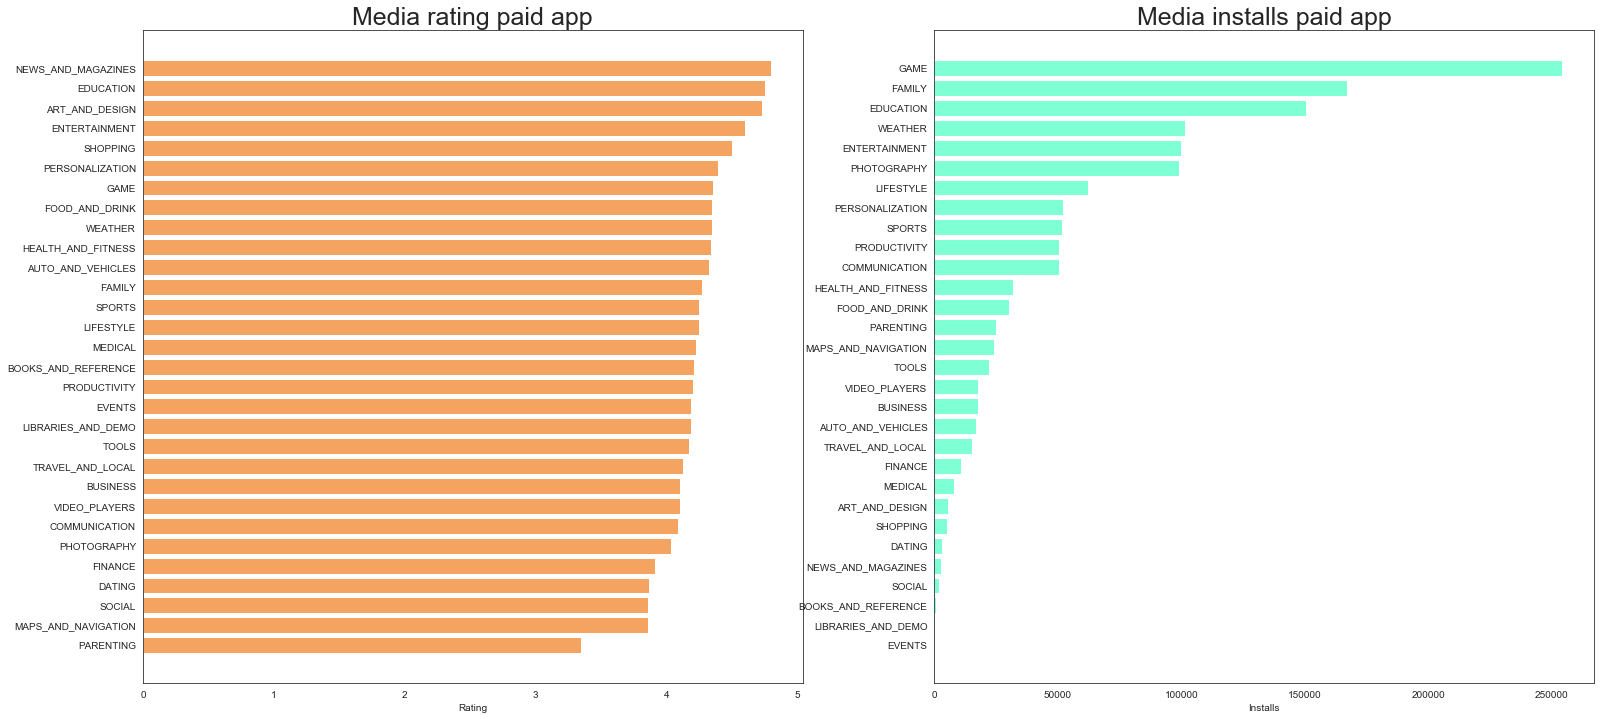

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(26, 12))
ax1.barh(media_rating_paid['Category'],media_rating_paid['Rating'],color='sandybrown')
ax2.barh(media_installs_paid['Category'],media_installs_paid['Installs'],color='aquamarine')
ax1.set(xlabel='Rating')
ax2.set(xlabel='Installs')
ax1.set_title('Media rating paid app',fontsize=25)
ax2.set_title('Media installs paid app',fontsize=25)
plt.show()

### Le categorie per le app paid ai primi posti nelle installazioni e che lo sono anche nel rating sono "game","education","entertainment"

In [85]:
game=df[df['Category'].isin(['GAME'])]

In [86]:
media_rating_game= game.groupby(['Genres','Type'],as_index=False)['Rating'].mean().sort_values(by='Rating')
media_rating_game_paid= media_rating_game[media_rating_game['Type'].isin(['Paid'])]
media_installs_game=game.groupby(['Genres','Type'],as_index=False)['Installs'].mean().sort_values(by='Installs')
media_installs_game_paid=media_installs_game[media_installs_game['Type'].isin(['Paid'])]

Text(0.5,1,'Game installs paid app')

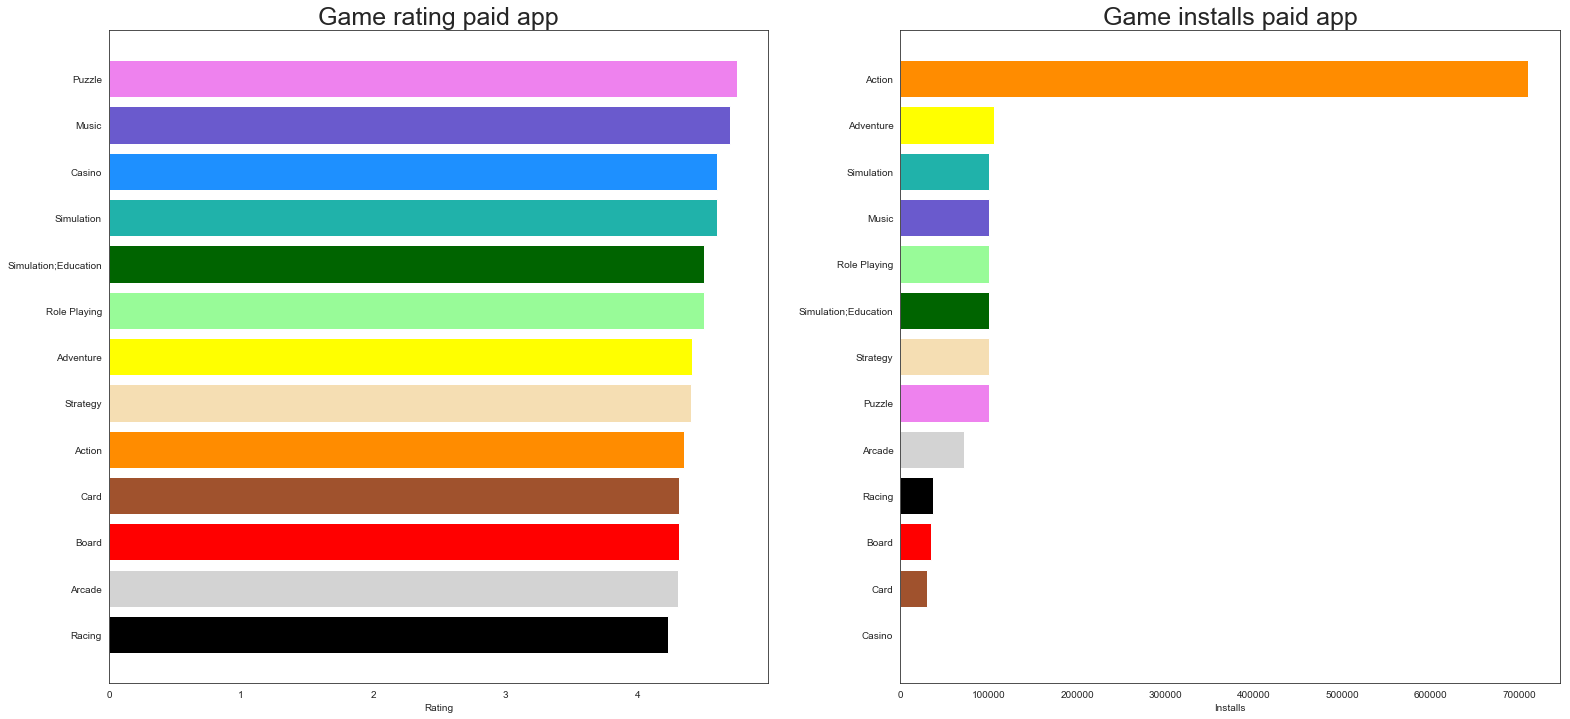

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(26, 12))
palette=['black','lightgray','red','sienna','darkorange','wheat','yellow','palegreen','darkgreen','lightseagreen',
         'dodgerblue','slateblue','violet']
color=['dodgerblue','sienna','red','black','lightgray','violet','wheat','darkgreen','palegreen','slateblue',
       'lightseagreen','yellow','darkorange']
ax1.barh(media_rating_game_paid['Genres'],media_rating_game_paid['Rating'],color=palette)
ax2.barh(media_installs_game_paid['Genres'],media_installs_game_paid['Installs'],color=color)
ax1.set(xlabel='Rating')
ax2.set(xlabel='Installs')
ax1.set_title('Game rating paid app',fontsize=25)
ax2.set_title('Game installs paid app',fontsize=25)

### Il genere 'action' nelle app paid è nettamento quello con più installazioni, nonostante non sia comunque tra i primi posti come rating medio

In [88]:
action=df[df['Genres'].isin(['Action'])]
action_paid=action[action['Type'].isin(['Paid'])]
action_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1837,Call of Duty:Black Ops Zombies,GAME,4.2,13004,46.0,100000,Paid,6.99,Teen,Action
3977,B-Grade Renegade,GAME,3.9,24,64.0,1000,Paid,1.99,Teen,Action
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,Action
4419,Oddworld: New 'n' Tasty,GAME,4.6,1475,34.0,10000,Paid,4.99,Teen,Action
4708,Mental Hospital V,GAME,4.2,2460,25.0,50000,Paid,0.99,Mature 17+,Action
4842,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.3,13604,96.0,1000000,Paid,0.99,Teen,Action
4901,Assassin's Creed Identity,GAME,3.7,42529,92.0,500000,Paid,1.99,Teen,Action
5557,Nightenfell: Shared AR,GAME,4.5,20,65.0,1000,Paid,0.99,Everyone 10+,Action
5631,Five Nights at Freddy's,GAME,4.6,100805,50.0,1000000,Paid,2.99,Teen,Action
5641,Five Nights at Freddy's: SL,GAME,4.5,16162,99.0,100000,Paid,2.99,Teen,Action


Text(0.5,1,'Size Action Paid App')

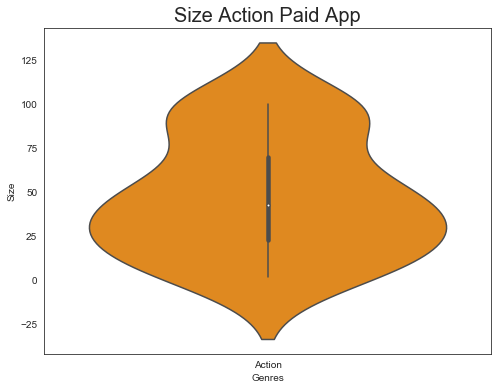

In [89]:
plt.figure(figsize=(8,6))
sns.violinplot(data=action_paid, x="Genres", y="Size",color="darkorange")
plt.title('Size Action Paid App',size=20)

### Le app game che fanno parte del genere action hanno solitamente dimensioni comprese tra i 20 e i 50 megabyte

<Figure size 3600x3600 with 0 Axes>

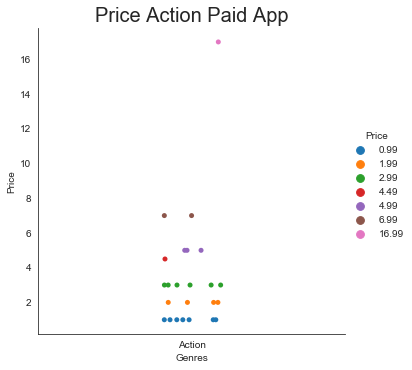

In [58]:
plt.figure(figsize=(50,50))
sns.catplot(data=action_paid, x="Genres", y="Price",hue="Price")#,color="darkorange",)
plt.title('Price Action Paid App',fontsize=20)
plt.show()

### Quasi tutte le app paid del genere action sono sotto i 7 dollari

## Conclusione

### La maggior parte delle app sono gratuite rispetto a quelle a pagamento. Ottime categorie per le applicazioni free sono "social","productivity" e "communication" perchè tutte e 3 hanno mediamente un ottimo rating e un buon numero di installazioni, generalmente sono anche di dimensioni ridotte tra 0 e 20 megabyte. Se si vuole optare per la creazione di un app a pagamento uno buona categoria potrebbe essere quella del "game", in particolare del genere "action", il costo non supera quasi mai i 7 dollari e le dimensioni sono spesso tra i 20 e i 50 megabyte